In [1]:
import pandas as pd

- folium : 지도 연동 패키지

In [2]:
import folium
from os import path, mkdir

In [3]:
map_osm = folium.Map(location = [37.5004444, 127.0313861], zoom_start = 17)
map_osm

In [4]:
map_osm1 = folium.Map(location = [37.5004444, 127.0313861], zoom_start = 17)

marker1 = folium.Marker([37.5004444, 127.0313861], popup = '메가스터디IT아카데미 강남',
                        icon = folium.Icon(color = 'darkred'))

marker1.add_to(map_osm1)
map_osm1

In [5]:
df = pd.read_excel("./data/school.xlsx")

In [10]:
df2 = df[['학교명', '학교급구분', '소재지도로명주소', '위도', '경도']]
df2.head()

,학교명,학교급구분,소재지도로명주소,위도,경도
0,한울초등학교,초등학교,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍),37.126961,126.917854
1,수원농생명과학고등학교,고등학교,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교),37.295154,127.019450
2,녹양중학교,중학교,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동),37.761864,127.028084
3,초락초등학교,초등학교,충청남도 당진시 석문면 샛터말길 35 (석문면),36.993080,126.510472
4,상봉초등학교,초등학교,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍),36.638251,127.286142


In [15]:
df3 = df2.query("학교급구분 == '고등학교' and 소재지도로명주소.str.contains('서울')")
df3.head()

,학교명,학교급구분,소재지도로명주소,위도,경도
6,경기고등학교,고등학교,서울특별시 강남구 영동대로 643 . 경기고등학교 (삼성동),37.517565,127.056076
89,대일관광고등학교,고등학교,서울특별시 양천구 신정이펜1로 11 . 대일관광고등학교 (신정동. 대일관광고등학교),37.511414,126.834907
97,한광고등학교,고등학교,서울특별시 강서구 등촌로13길 110 (화곡동),37.538844,126.857922
98,상일미디어고등학교,고등학교,서울특별시 강동구 천호대로219길 61 . 상일미디어고등학교 (상일동),37.549470,127.170767
118,선정국제관광고등학교,고등학교,서울특별시 은평구 서오릉로20길 19 . 선정국제관광고등학교 (갈현동),37.618705,126.909032


In [20]:
map_osm = folium.Map(location=[37.566651, 126.978428], zoom_start = 12)

html = "<font color='green' style='white-space: nowrap'><b>%s</b></font>"

for i in df3.index:
    marker = folium.Marker([df3.loc[i, '위도'], df3.loc[i, '경도']], popup = html % (df3.loc[i, '학교명']))
    marker.add_to(map_osm)

map_osm

In [23]:
import requests
from IPython.display import SVG
from bs4 import BeautifulSoup
import numpy as np
import os

In [27]:
df = pd.read_excel("./data/senior_lsf.xlsx", index_col = '지역명')

In [28]:
df.head()

,복지시설
지역명,
Jongno-gu,61
Jung-gu,53
Yongsan-gu,110
Seongdong-gu,155
Gwangjin-gu,103


In [29]:
map_file_path = "./data/map_seoul.svg"

if os.path.exists(map_file_path):
    with open(map_file_path, 'r')as f:
        map_svg = f.read()

    print(map_svg)

<?xml version="1.0" encoding="utf-8"?>
<!-- Generator: Adobe Illustrator 15.1.0, SVG Export Plug-In . SVG Version: 6.00 Build 0)  -->
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
	 width="1400px" height="1400px" viewBox="0 0 1400 1400" enable-background="new 0 0 1400 1400" xml:space="preserve">
<path id="Dobong-gu" fill-rule="evenodd" clip-rule="evenodd" fill="#C8C8C8" d="M964.064,164.667
	c-1.447,9.018-0.285,18.105-2.002,27.506c-2.068,11.332-9.018,22.101-11.502,33.507c-0.867,3.979-0.977,9.201-1.5,14.003
	c-0.508,4.656-1.969,10.129-1.5,14.003c0.779,6.456,5.756,14.04,8.502,21.005c2.287,5.805,7.385,15.948,8.002,21.505
	c0.539,4.856-0.953,11.628-1.502,17.504c-0.547,5.879-1.484,11.904-2,17.504c-1.135,12.346-0.799,25.368-3,36.008
	c-1.582,7.641-5.57,14.402-7.002,21.505c-1.725,8.558-1.271,18.438-3,27.506c-6.813,0.0

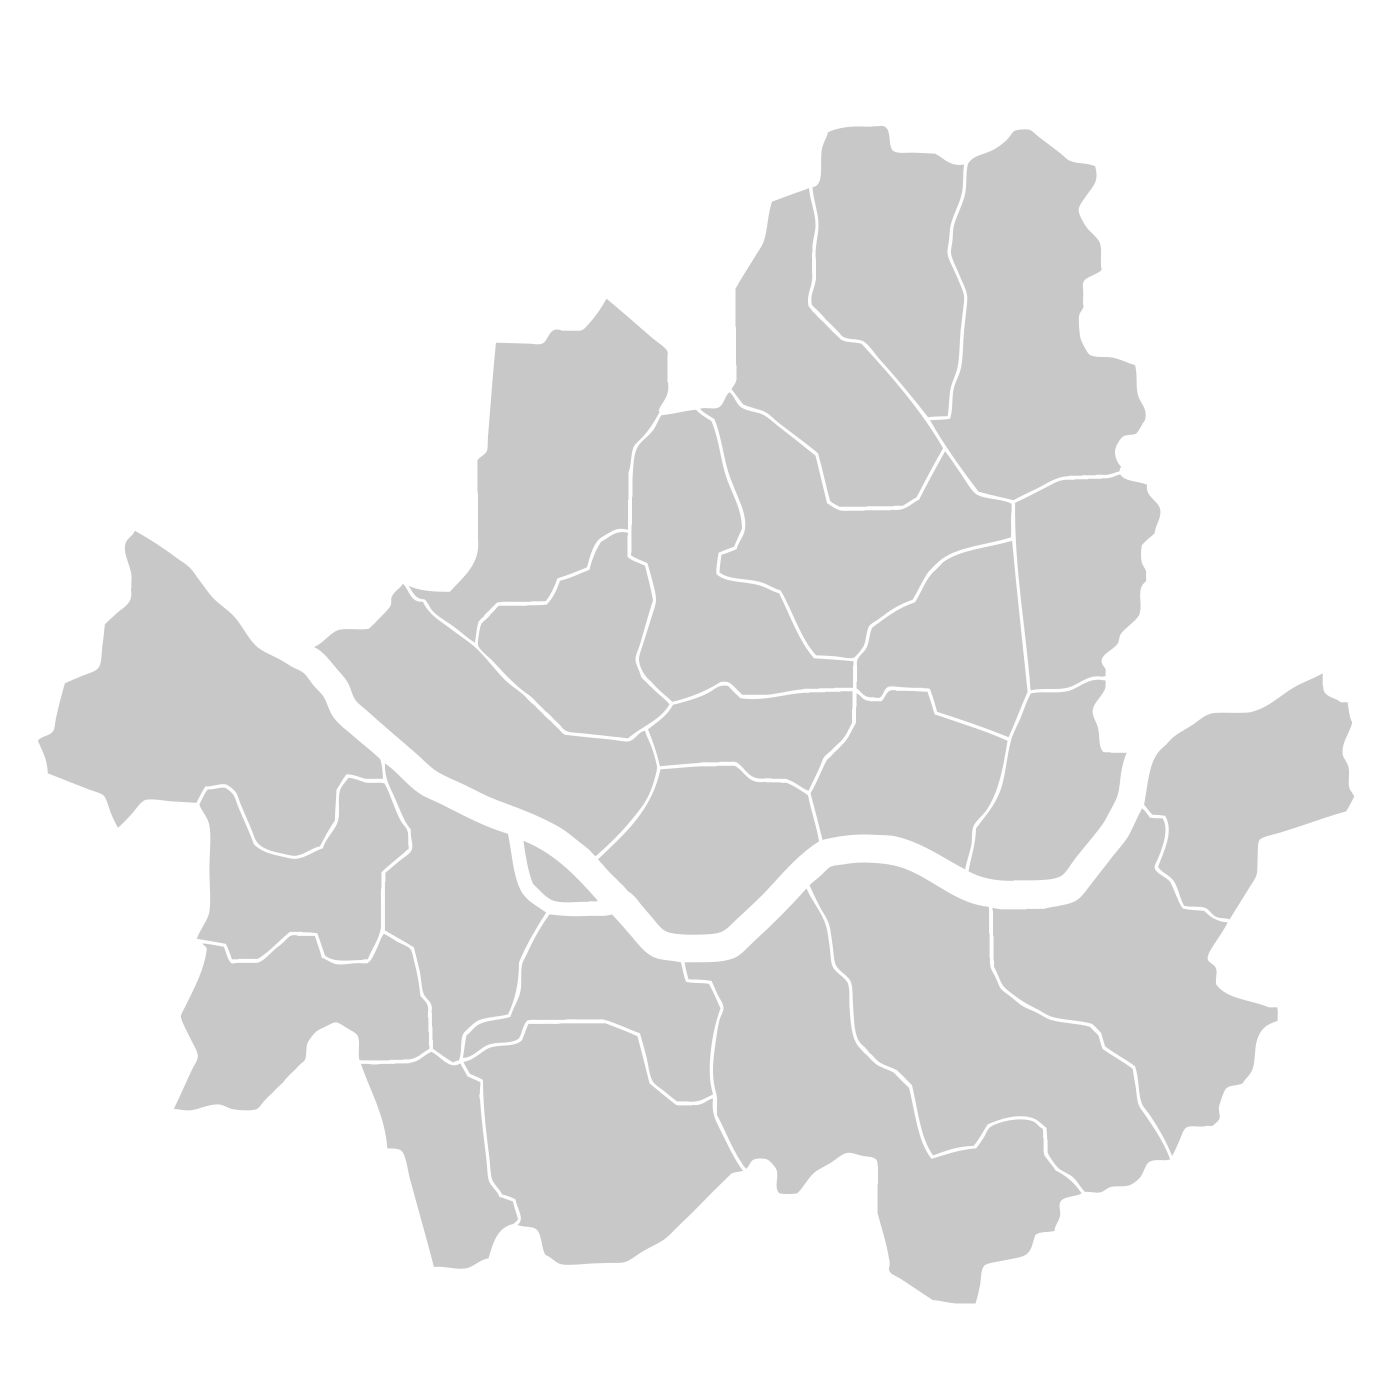

In [30]:
SVG(map_svg)

In [32]:
colors = ['#3d00e0', '#5300e8', '#6002ee', '#7e3ff2', '#9965f4', '#b794f6']

In [34]:
soup = BeautifulSoup(map_svg)

In [36]:
path_list = soup.select('path[id]')
path_list[0]

<path clip-rule="evenodd" d="M964.064,164.667
	c-1.447,9.018-0.285,18.105-2.002,27.506c-2.068,11.332-9.018,22.101-11.502,33.507c-0.867,3.979-0.977,9.201-1.5,14.003
	c-0.508,4.656-1.969,10.129-1.5,14.003c0.779,6.456,5.756,14.04,8.502,21.005c2.287,5.805,7.385,15.948,8.002,21.505
	c0.539,4.856-0.953,11.628-1.502,17.504c-0.547,5.879-1.484,11.904-2,17.504c-1.135,12.346-0.799,25.368-3,36.008
	c-1.582,7.641-5.57,14.402-7.002,21.505c-1.725,8.558-1.271,18.438-3,27.506c-6.813,0.022-13.387,0.283-19.506,1
	c-14.793-19.111-31.705-39.509-48.51-58.013c-4.902-5.398-11.217-16.078-17.504-18.504c-7.016-2.707-17.623,0.042-22.006-7.001
	c-4.459-4.876-9.127-9.544-14.002-14.003c-0.148-1.02-1.354-0.98-1.502-2c-3.959-4.376-8.127-8.544-12.502-12.503
	c-2.484-9.723,2.434-16.186,3.5-24.005c1.156-1.678,0.176-5.493,0.5-8.001c0-4.168,0-8.335,0-12.503
	c-1.914-13.504,2.932-25.383,2.502-37.009c-0.459-12.384-5.236-23.798-6.002-36.508c11.756-1.325,7.563-21.182,9.002-35.508
	c0.838-8.333,5.449-13.907,6.502-19.504c9.998-4

In [41]:
type(path_list[0])

bs4.element.Tag

In [44]:
path_list[0]['id']

'Dobong-gu'

In [45]:
path_list[0]['fill']

'#C8C8C8'

In [46]:
for p in path_list:
    gu = p['id']
    num_fac = df.loc[gu, '복지시설']

    if num_fac > 250:   color_index = 0
    elif num_fac > 200: color_index = 1
    elif num_fac > 150: color_index = 2
    elif num_fac > 100: color_index = 3
    elif num_fac > 50:  color_index = 4
    else:               color_index = 5

    p['fill'] = colors[color_index]

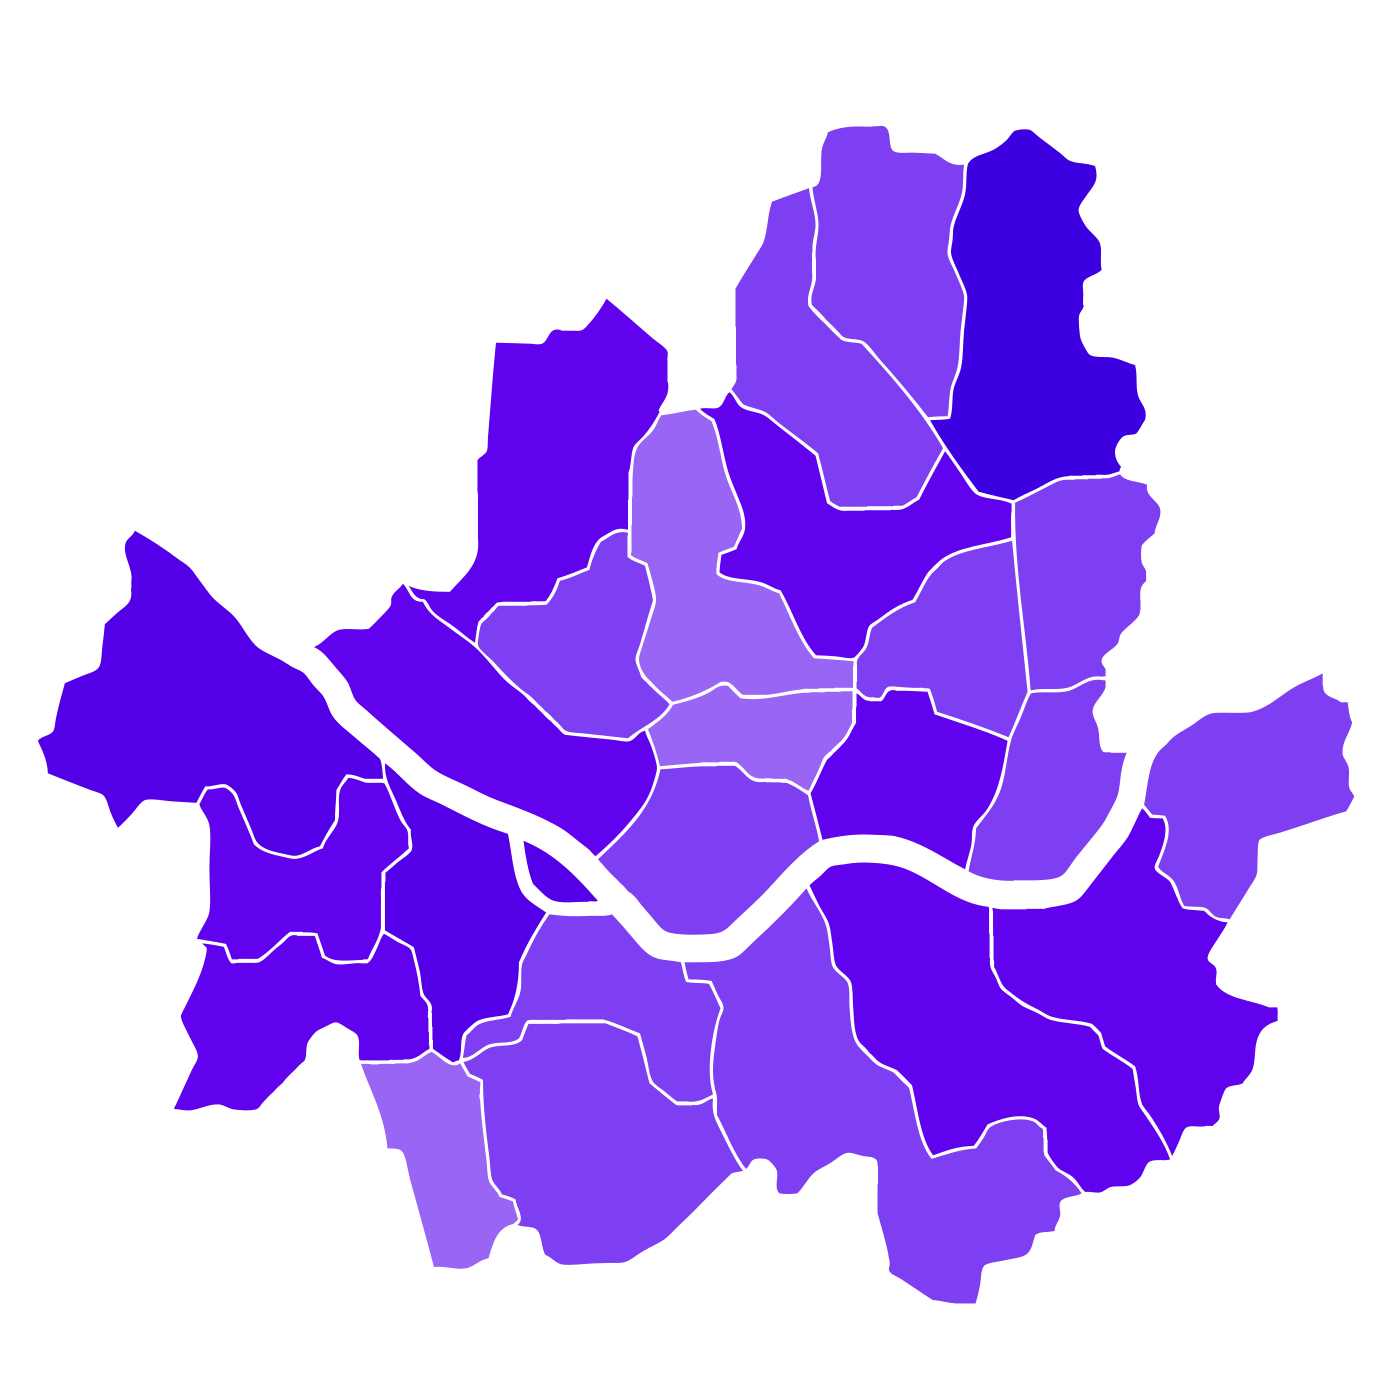

In [47]:
new_seoul_svg = soup.prettify()

SVG(new_seoul_svg)

In [48]:
with open('./data/new_seoul_svg.svg', 'w', encoding="utf-8") as f:
    f.write(new_seoul_svg)